<a href="https://colab.research.google.com/github/naraphattul/229352-StatisticalLearning/blob/main/660510769_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [59]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

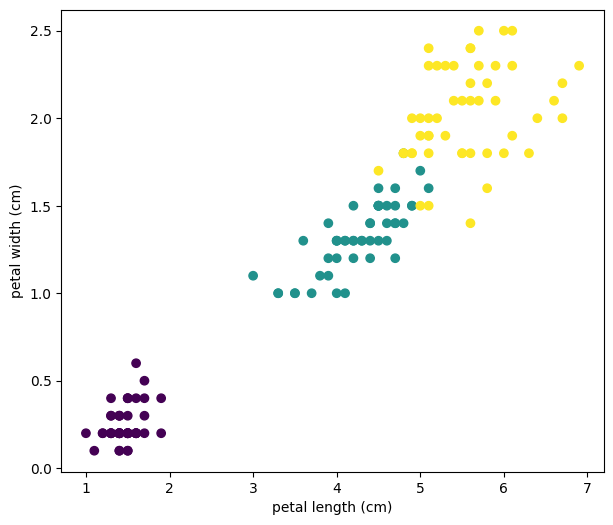

In [60]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [68]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [62]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

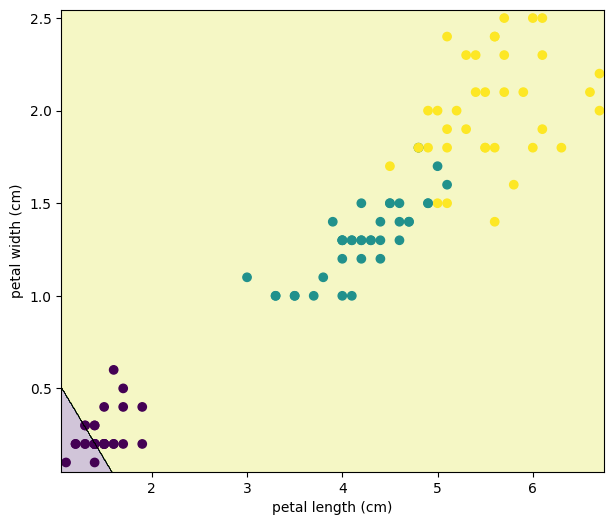

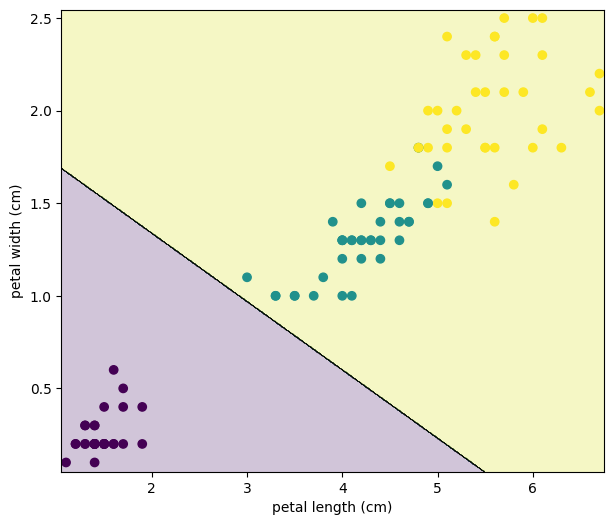

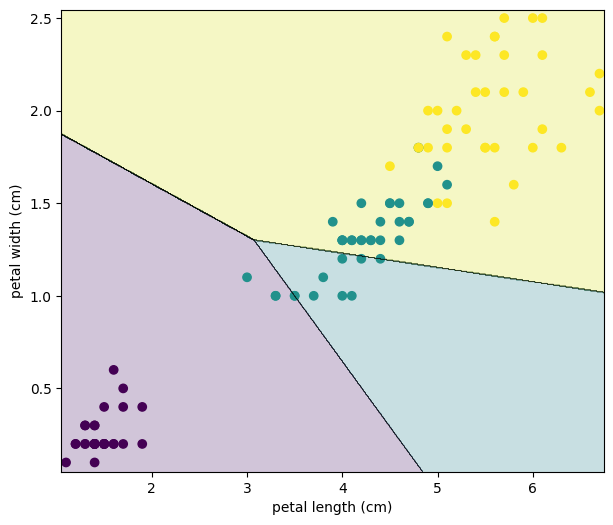

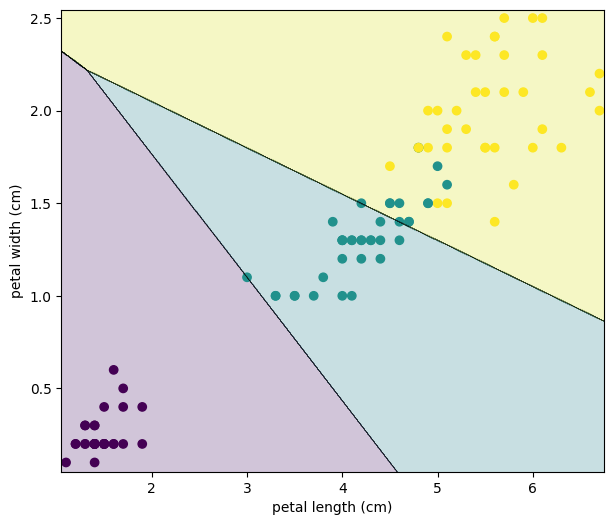

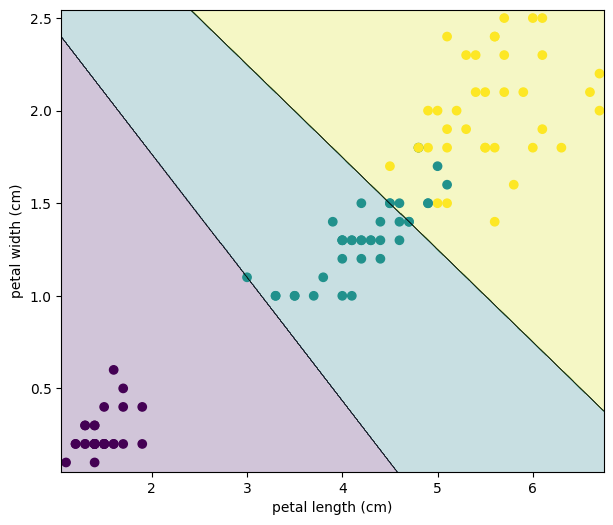

In [69]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    linear_svm = LinearSVC(C=C, loss='hinge', max_iter=100000, random_state=42)
    linear_svm.fit(X_train, y_train)
    plot_decision_boundary(linear_svm, X_train, y_train)


Effect of C on the decision boundary คือ หากค่า C สูง จะมีการทำ regularization น้อยลง เส้นแบ่งข้อมูลจะมีการซับซ้อนมากขึ้น เพื่อจำให้แม่นยำมากที่สุด เสี่ยงเกิด Overfitting ในขณะที่ถ้า C ต่ำ จะเสี่ยงเกิด Underfitting

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [70]:
#TODO
linear_svm = LinearSVC(C=0.1, loss='hinge', max_iter=100000, random_state=42)
linear_svm.fit(X_train, y_train)

LinearSVC(C=0.1, loss='hinge', max_iter=100000, random_state=42)

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

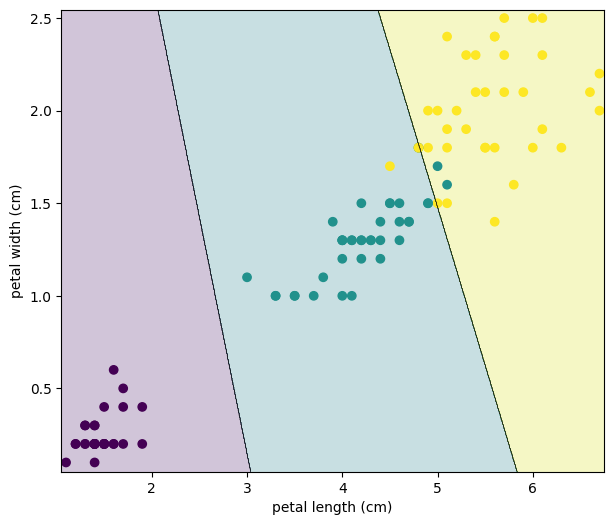

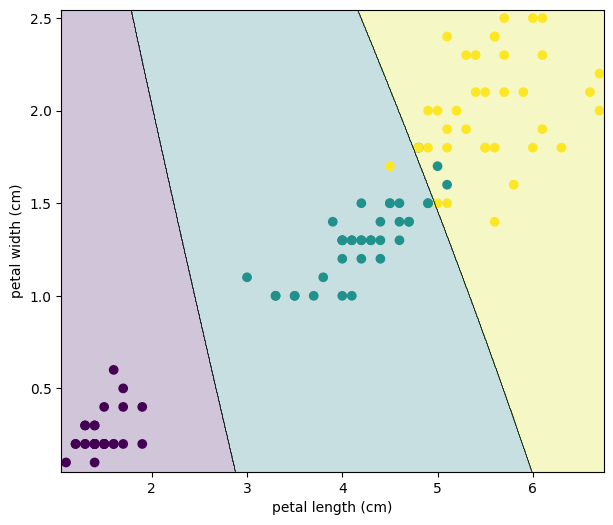

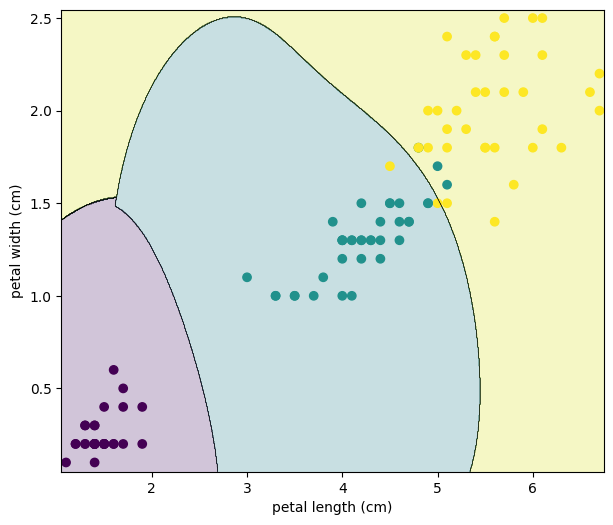

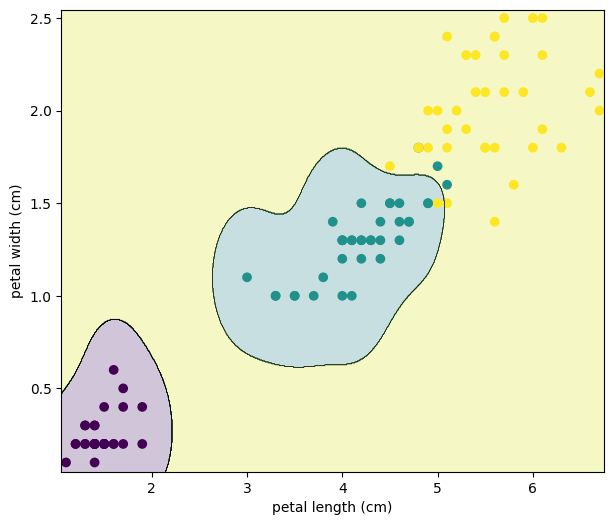

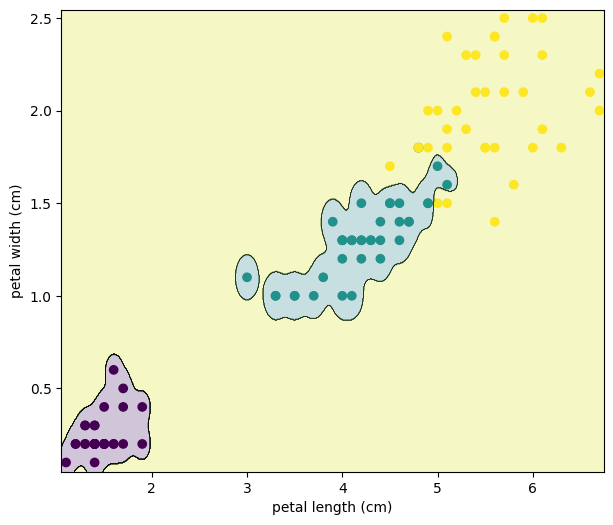

In [71]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)
    rbf_svm.fit(X_train, y_train)
    plot_decision_boundary(rbf_svm, X_train, y_train)

 Effect of gamma on the decision boundary คือ ยิ่ง gamma มากจะทำให้ ขอบเขตแคบ เส้นแบ่งซับซ้อน มีการล้อมจุด มีความเสี่ยงที่จะเกิด Overfitting ในขณะที่ถ้า gamma ต่ำ จะเสี่ยงเกิด Underfitting

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [72]:
#TODO
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=100000, random_state=42)
rbf_svm.fit(X_train, y_train)

SVC(gamma=0.1, max_iter=100000, random_state=42)

#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [79]:
from sklearn.metrics import accuracy_score

In [86]:
# By using test accuracy
best_C = 1.0

C_linear_svm = LinearSVC(C=best_C, loss='hinge', max_iter=100000, random_state=42)
C_linear_svm.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, C_linear_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, C_linear_svm.predict(X_test))

print(f"C Train Accuracy: {train_accuracy:.4f}")
print(f"C Test Accuracy: {test_accuracy:.4f} \n")

best_gamma = 1.0

gamma_rbf_svm = SVC(kernel='rbf', C=1.0, gamma=best_gamma, max_iter=100000, random_state=42)
gamma_rbf_svm.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, gamma_rbf_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, gamma_rbf_svm.predict(X_test))

print(f"Gamma Train Accuracy: {train_accuracy:.4f}")
print(f"Gamma Test Accuracy: {test_accuracy:.4f} \n")

C Train Accuracy: 0.7333
C Test Accuracy: 0.7556 

Gamma Train Accuracy: 0.9524
Gamma Test Accuracy: 1.0000 



By using test accuracy พบว่า เลือกใช้ Kernel SVM ใน Iris data เพราะได้ Accuracy ที่ดีกว่าการใช้ Linear SVM

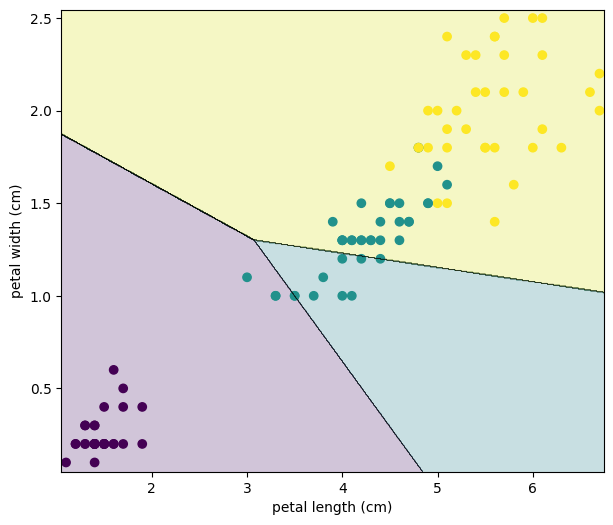

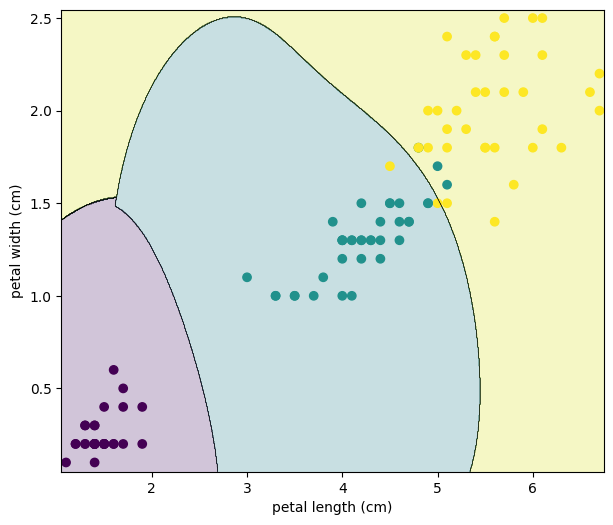

In [87]:
# By using decision boundary plot
plot_decision_boundary(C_linear_svm, X_train, y_train)
plot_decision_boundary(gamma_rbf_svm, X_train, y_train)


By using decision boundary plot พบว่า เลือกใช้ Kernel SVM ใน Iris data ดีกว่า
เพราะเส้น Boundary lines สามารถครอบคลุมข้อมูล Target ได้มากกว่าการใช้ Linear SVM